# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
# running in google colab, so not needed
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plotly interactive graphs
import plotly.express as px

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/FoodHub')
os.listdir()

['foodhub_order.csv',
 'original-PYF_Project_LearnerNotebook_FullCode.ipynb',
 'sm-PYF_Project_LearnerNotebook_FullCode.ipynb']

In [ ]:
# Write your code here to read the data
data = pd.read_csv('foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 1898
Number of columns: 9


#### Observations:

* Number of rows: 1898
* Number of columns: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* **int64:**  delivery_time, food_preparation_time, customer_id
* **float64:** cost_of_the_order
* **object(string):** restaurant_name, day_of_week, rating, cusine_type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
print(data.isnull().sum())
print(f'There is no missing data here as shown by the max of missing data {data.isna().sum().max()}')

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
There is no missing data here as shown by the max of missing data 0


#### Observations:
* no missing data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
print(f'The min, mean and max are shown below in minutes with precision of 2\n')
data.describe().loc[['min', 'mean', 'max'], 'food_preparation_time'].to_frame().round(2)


The min, mean and max are shown below in minutes with precision of 2



,food_preparation_time
min,20.00
mean,27.37
max,35.00


#### Observations: Food Preperation Time
* min	20.00
* mean	27.37
* max	35.00


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
data['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
rating_counts = data['rating'].value_counts().to_frame()
rating_counts.loc[rating_counts.index == 'Not given'].reset_index()

,rating,count
0,Not given,736


#### Observations:
```csv
rating	   count
Not given	 736
```


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**univariate exploration: rating**

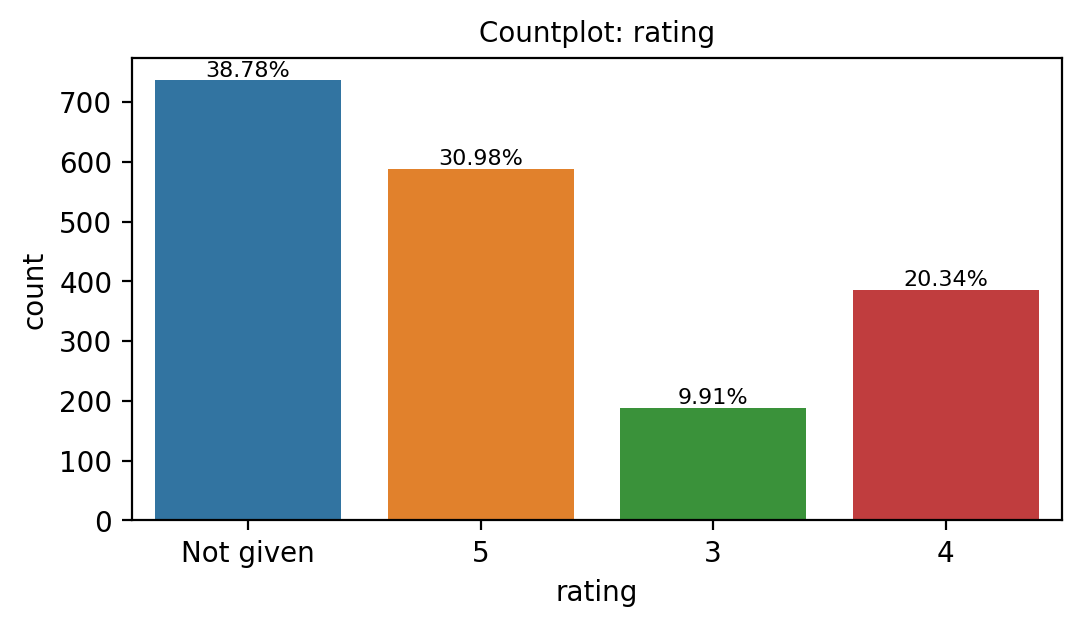

In [ ]:
# Write the code here

# Univariate:  Ratings:

# barplot: rating
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('Countplot: rating', fontsize=10)  # Adjust title font size
sns.countplot(data=data, x='rating', hue='rating', ax=ax);

# calculate percentage, so we can show it on top of the bars
totalBars = data['rating'].shape[0]
for p in ax.patches:
  percentage = f'{100* p.get_height()/totalBars:.2f}%'
  ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=8)




**Observations: rating**
* 39% gave no ratings
* 31% gave a 5 rating
* 20% gave 4 rating
* 10% gave 3 rating

**Univariate:  cuisine_type:**

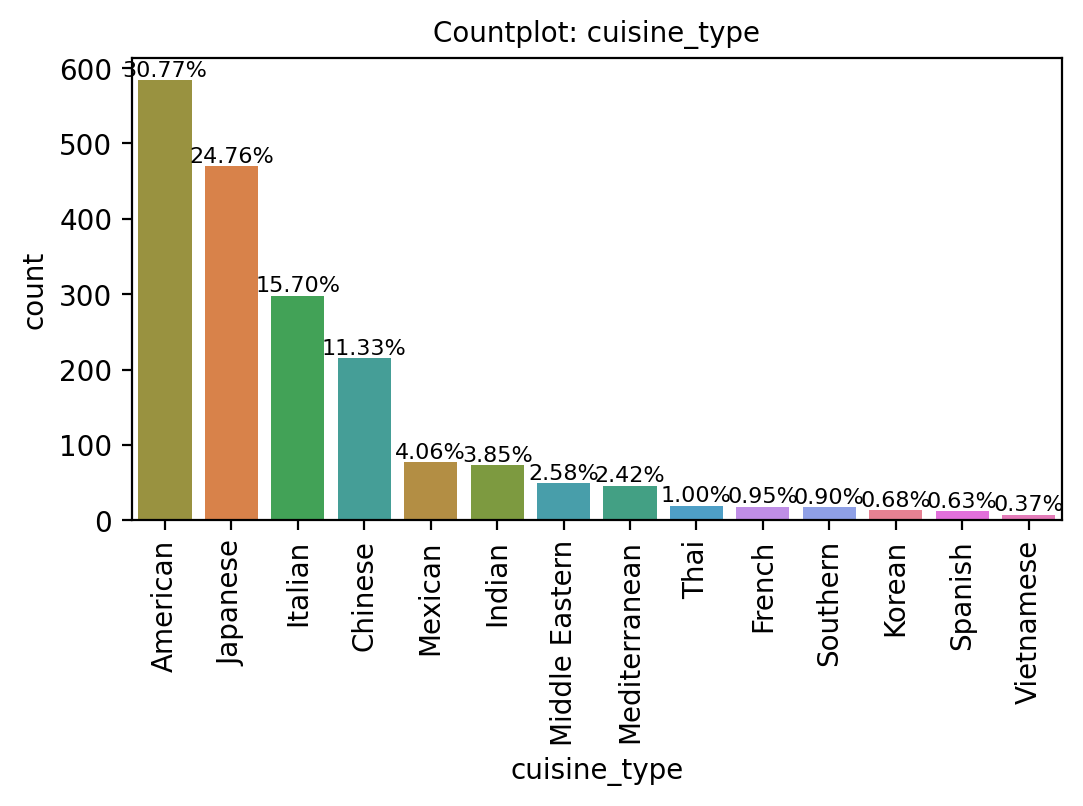

In [ ]:
# Univariate:  cuisine_type:

sorted_values = data['cuisine_type'].value_counts().sort_values(ascending=False).index.to_list()


# Count plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('Countplot: cuisine_type', fontsize=10)
sns.countplot(data=data, x='cuisine_type', hue='cuisine_type',order=sorted_values, ax=ax)


# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the total number of entries for percentage calculation
total = data['cuisine_type'].value_counts().sum()

# Annotate bars with percentage information
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)




**Observations: cuisine_type**
* American Food is most popular, followed by Japanese, Italian, Chinese...

**Univariate: cost_of_the_order:**

In [ ]:
data['cost_of_the_order'].mean()

16.498851422550054

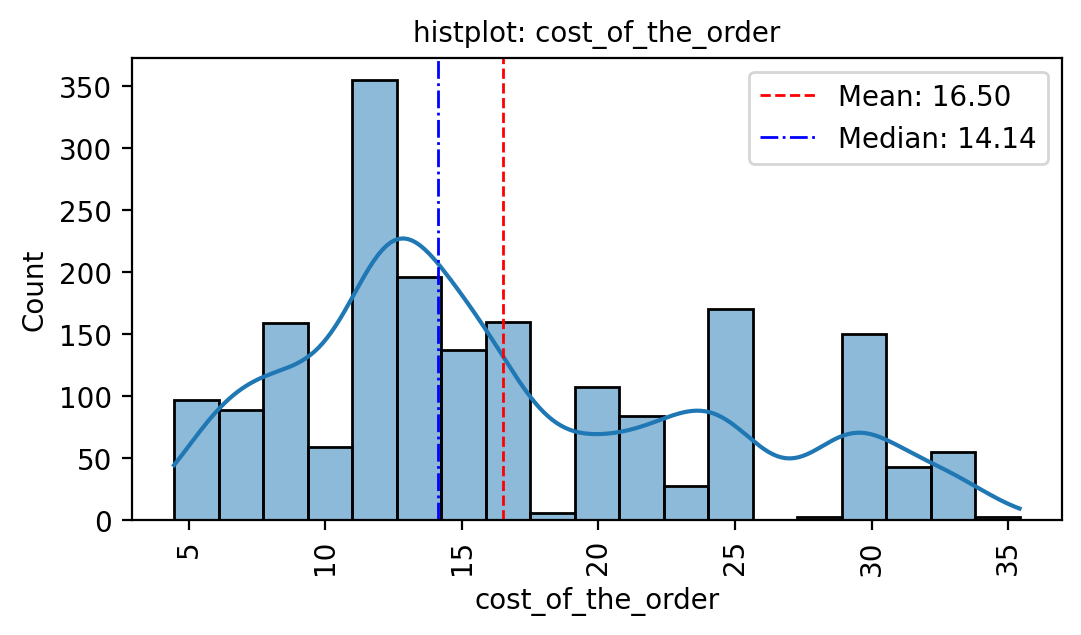

In [ ]:
# Univariate: cost_of_the_order:

# Bar plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('histplot: cost_of_the_order', fontsize=10)
sns.histplot(data=data, x='cost_of_the_order',kde=True, ax=ax);

# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the mean of cost_of_the_order
mean_value = data['cost_of_the_order'].mean()
median_value = data['cost_of_the_order'].median()

# Draw a vertical line at the mean value
ax.axvline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}');

# Draw a vertical line at the median value
ax.axvline(median_value, color='blue', linestyle='-.', linewidth=1, label=f'Median: {median_value:.2f}')


ax.legend();





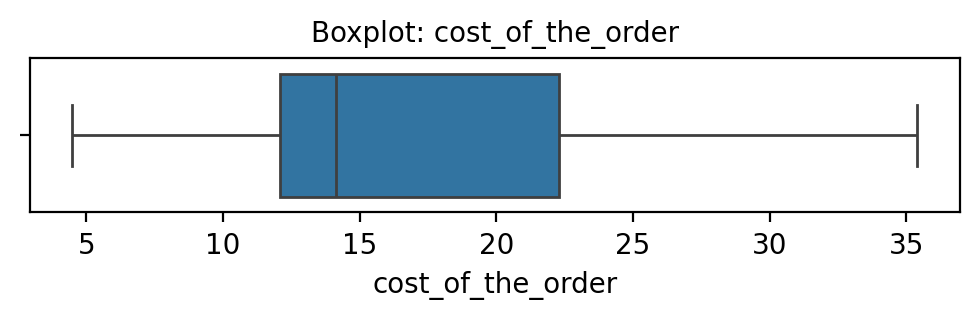

In [ ]:
# # Box plot for cuisine_type in order of highest to lowest

plt.figure(figsize=(6, 1), dpi=200)
plt.title('Boxplot: cost_of_the_order', fontsize=10)

sns.boxplot(data=data, x='cost_of_the_order');

**Observations: cost_of_the_order**

* The cost is right skewed, which is evident from the boxplot showing mean > median
* $12 is around the range, that shows the kde to peak, implying that's what most order values are around

* There does not seem to be much between $26 to $28, but around $30 to $34 there are some orders

**Univariate: day_of_the_week:**

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


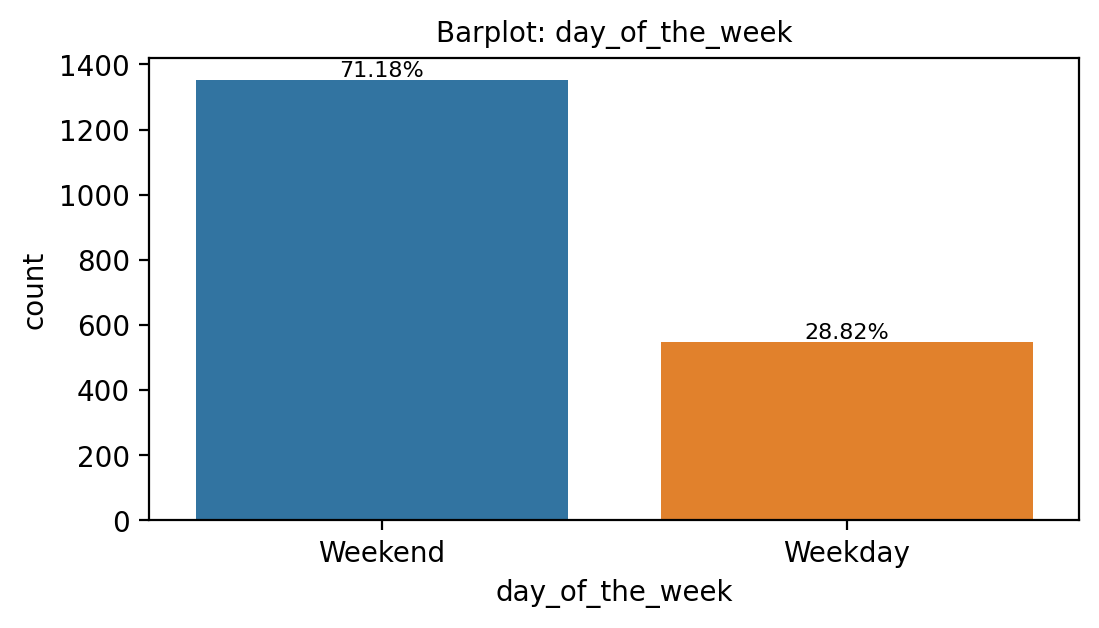

In [ ]:
# Bar plot for day_of_the_week
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('Barplot: day_of_the_week', fontsize=10)
sns.countplot(data=data, x='day_of_the_week', hue='day_of_the_week', ax=ax)



# Calculate the total number of entries for percentage calculation
total = data['day_of_the_week'].value_counts().sum()

# Annotate bars with percentage information
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)

**Observations: day_of_the_week**

* Weekends are busiest, with 71% of the orders

**Univariate: food_preparation_time:**

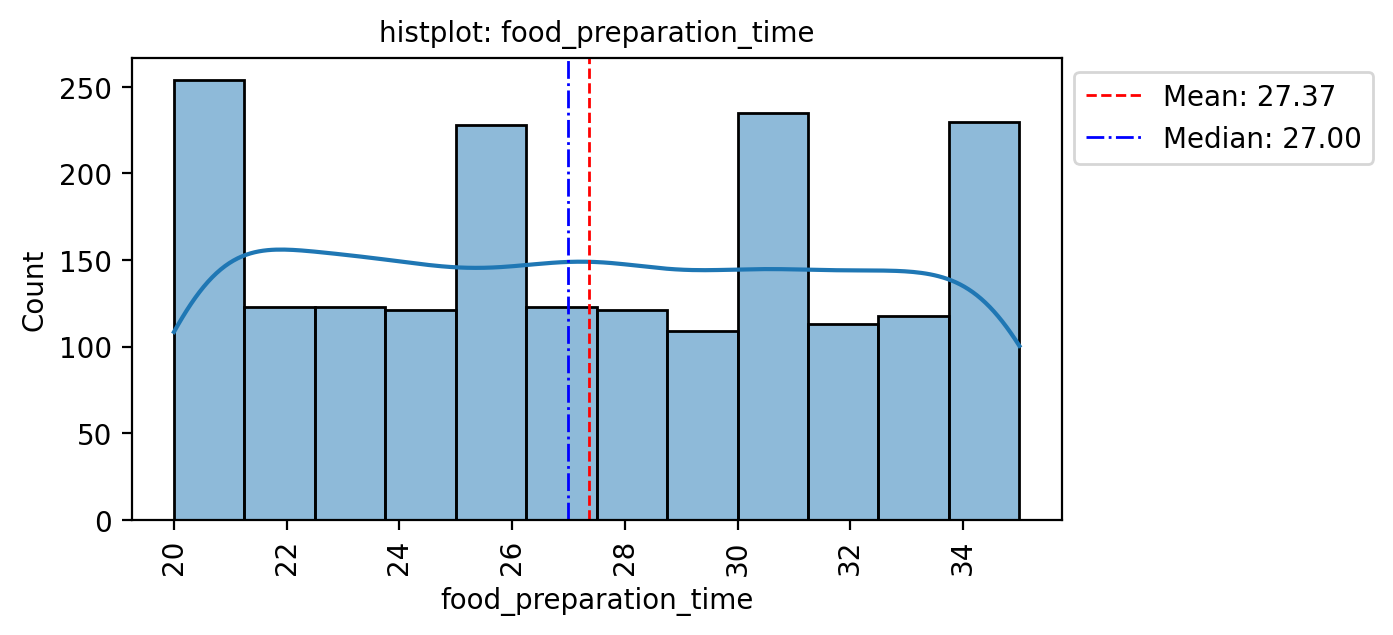

In [ ]:
# Univariate: food_preparation_time:

# Bar plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('histplot: food_preparation_time', fontsize=10)
sns.histplot(data=data, x='food_preparation_time',kde=True, ax=ax);

# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the mean of cost_of_the_order
mean_value = data['food_preparation_time'].mean()
median_value = data['food_preparation_time'].median()

# Draw a vertical line at the mean value
ax.axvline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}');

# Draw a vertical line at the median value
ax.axvline(median_value, color='blue', linestyle='-.', linewidth=1, label=f'Median: {median_value:.2f}')



ax.legend(bbox_to_anchor=[1.35,1]); # changeing the legends location in the plot

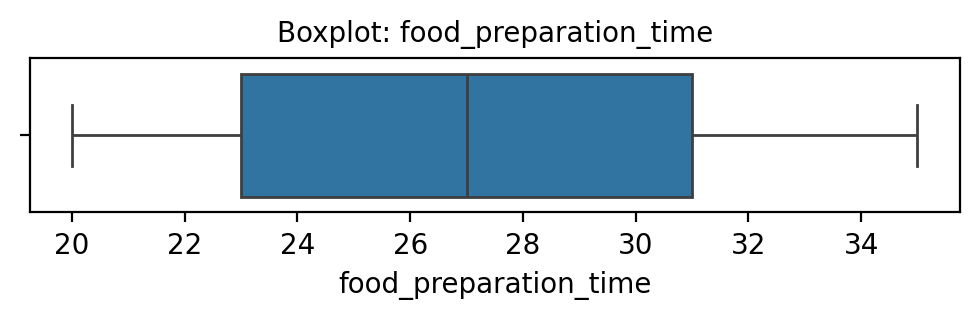

In [ ]:
# # Box plot for cuisine_type in order of highest to lowest

plt.figure(figsize=(6, 1), dpi=200)
plt.title('Boxplot: food_preparation_time', fontsize=10)

sns.boxplot(data=data, x='food_preparation_time');

**Observations: food_preparation_time'**
* mean and median are very close, so distribution is symmetrical


**Univariate: delivery_time**

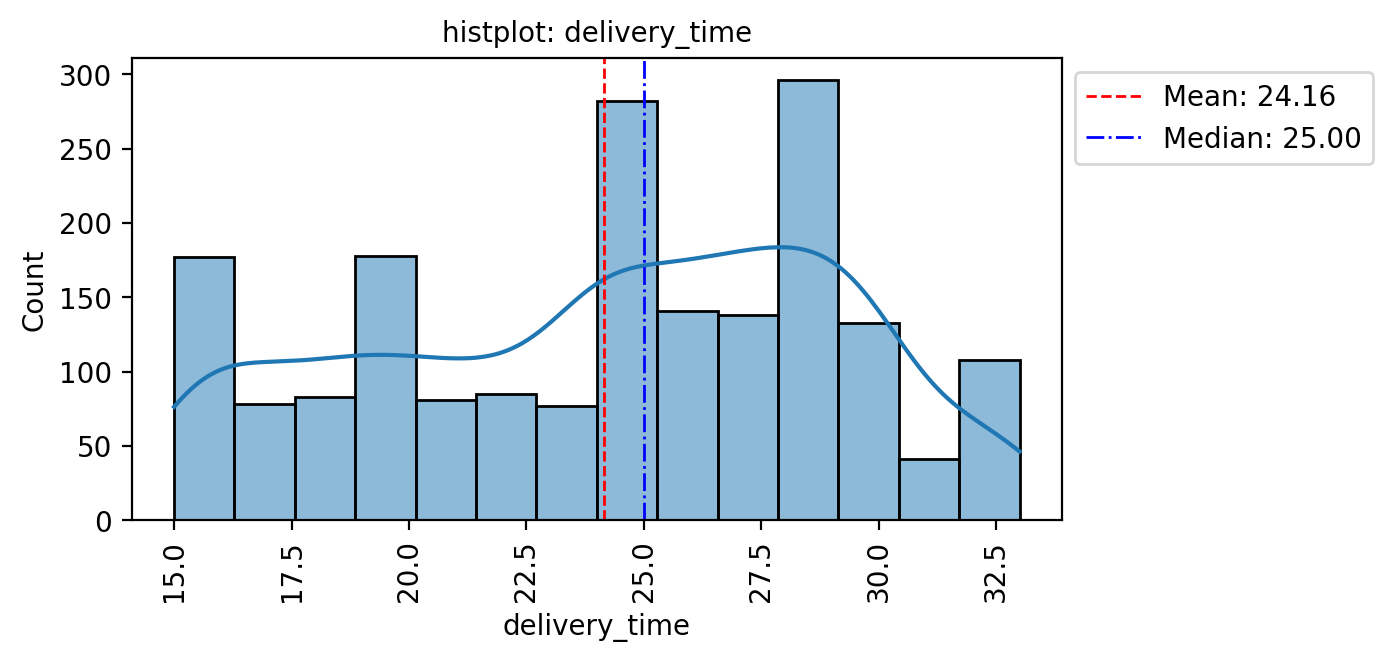

In [ ]:
# Univariate: food_preparation_time:

# Bar plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('histplot: delivery_time', fontsize=10)
sns.histplot(data=data, x='delivery_time',kde=True, ax=ax);

# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the mean of cost_of_the_order
mean_value = data['delivery_time'].mean()
median_value = data['delivery_time'].median()

# Draw a vertical line at the mean value
ax.axvline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}');

# Draw a vertical line at the median value
ax.axvline(median_value, color='blue', linestyle='-.', linewidth=1, label=f'Median: {median_value:.2f}')



ax.legend(bbox_to_anchor=[1.35,1]); # changeing the legends location in the plot

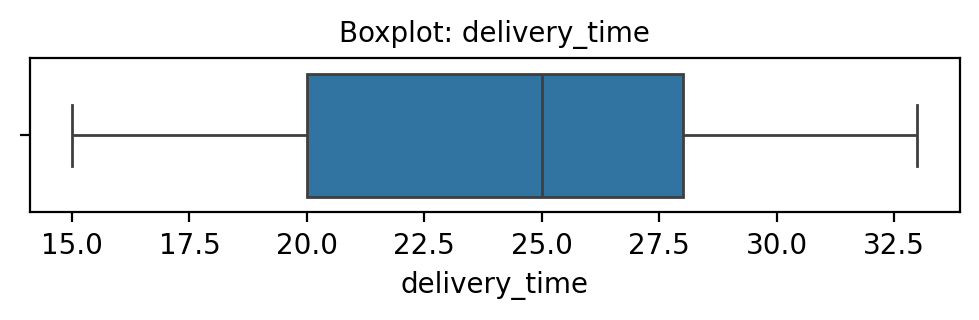

In [ ]:
# # Box plot for cuisine_type in order of highest to lowest

plt.figure(figsize=(6, 1), dpi=200)
plt.title('Boxplot: delivery_time', fontsize=10)

sns.boxplot(data=data, x='delivery_time');

**Observations: delivery_time'**
* mean and median are  kind of close, but it's still a bit left skewed
* it seems like around 28 minutes is where most orders are delivered (75%)
* there seems to be no big exceptions since there does not seem to be any outliers

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
num_unique_orders = data.groupby('restaurant_name')['order_id'].nunique()
top5 = num_unique_orders.sort_values(ascending=False).head(5)
print(top5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:

**Top 5 Restaurants in order of number of orders received**
```csv
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
```


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
data_weekend=data[data['day_of_the_week']=='Weekend']
data_weekend.groupby('cuisine_type').size().reset_index(name='count').sort_values(by='count', ascending=False).head(1)


,cuisine_type,count
0,American,415


#### Observations:
**most popular cuisine on weekends:** American at 415 counts


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
print(f"Orders more than $20: {len(data[data['cost_of_the_order']> 20])/len(data)*100:.2f}%")

Orders more than $20: 29.24%


#### Observations:
**Orders more than $20:** 29.24%



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
print(f"Mean Delivery time: {data['delivery_time'].mean():.2f}")

Mean Delivery time: 24.16


#### Observations:
**Mean Delivery time:** 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
data['customer_id' ].value_counts().head(3).to_frame().reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9


#### Observations:
**Top 3 Most Frequent Customers**
```csv
	  customer_id	  count
0	  52832	        13
1	  47440	        10
2	  83287	         9
```


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**We'll make a temporary dataset where missing ratings are not there, so we can do a heat map to find out corelation between ratings and other parameters**

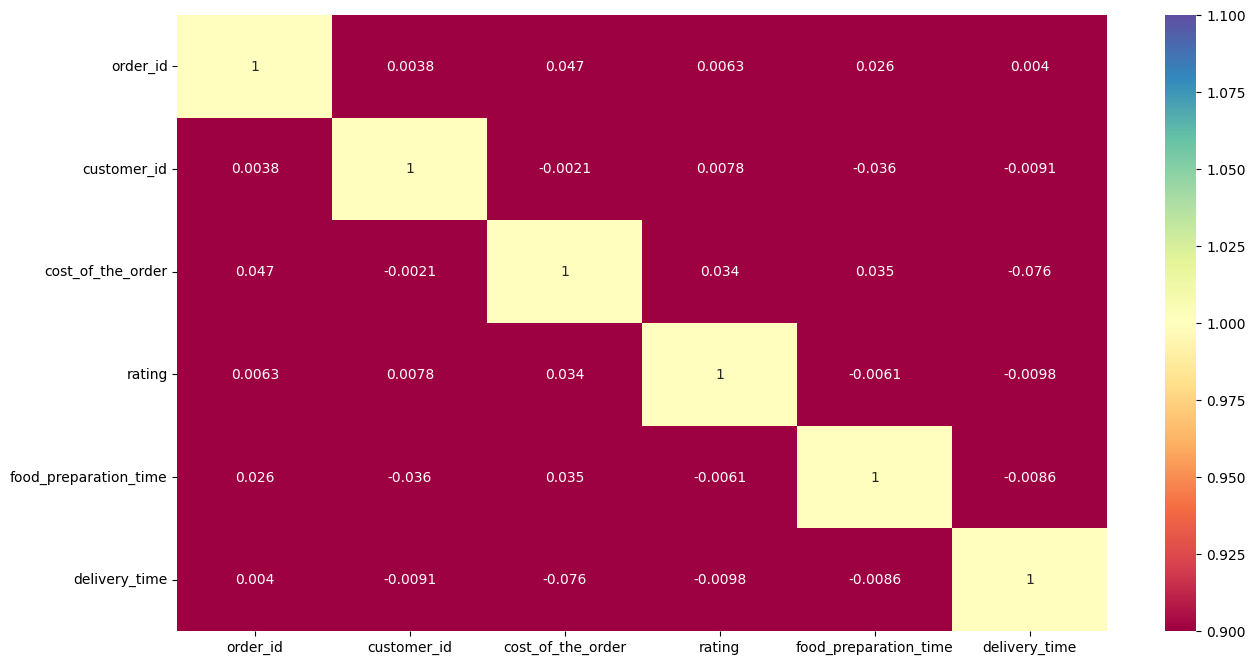

In [ ]:
dataWR = data[data['rating']!='Not given'].copy()
dataWR['rating'] = dataWR['rating'].astype('int64')
data_numeric = dataWR.select_dtypes(exclude=['object'])
corr = data_numeric.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Spectral', vmin=1, vmax=1);

#### Observations:
**Heat Map (with no_ratings removed) to see if ratings has any correlation with other parameters:**  No correlation stands out

* it's probably not good to drop that much data in any case.  Let's try some other ways to see if trends exist

**Let's try a barplot between cusine type and ratings**

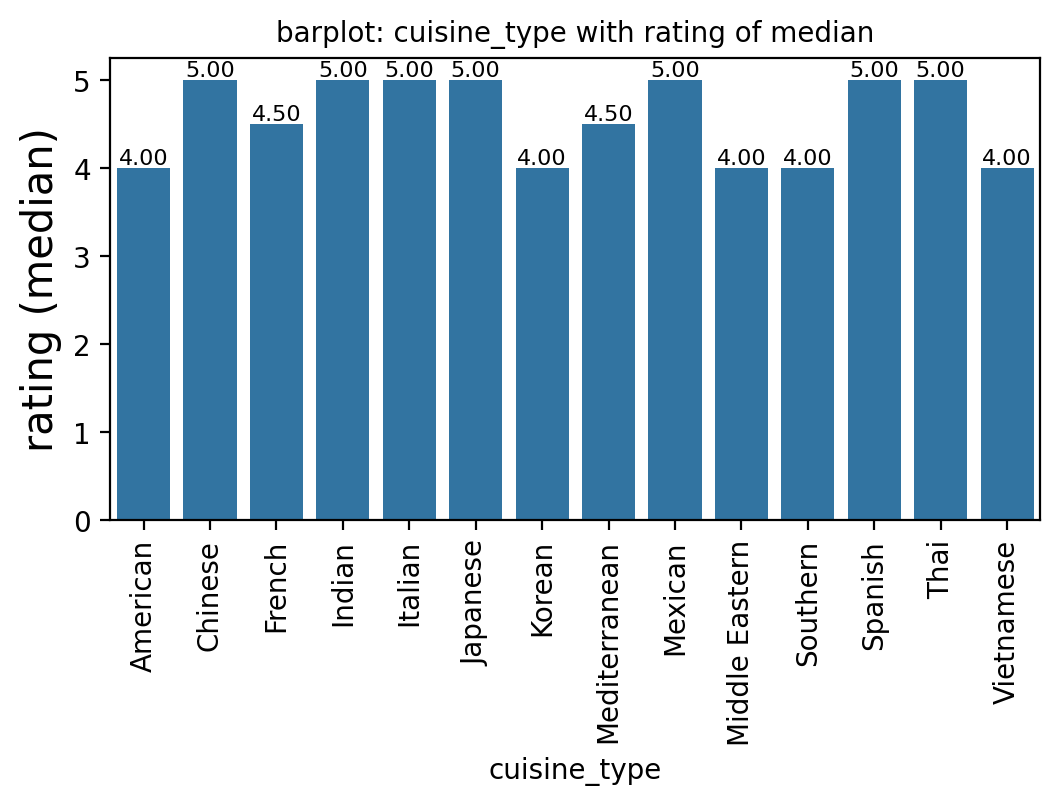

In [ ]:
# barplot between cusine type and ratings (median value of ratings)

cus_rat = dataWR.groupby('cuisine_type')['rating'].median().to_frame().reset_index()
#sns.barplot(x='cuisine_type', y='rating', data=cus_rat, ax=ax);



#dataWR[dataWR.groupby('cuisine_type')['rating'].transform(max) == dataWR['rating']

# Count plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('barplot: cuisine_type with rating of median', fontsize=10)
ax.set_ylabel(f'rating (median)', fontsize = 15)
sns.barplot(x='cuisine_type', y='rating', data=cus_rat, ax=ax);


# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the total number of entries for percentage calculation
total = data['cuisine_type'].value_counts().sum()

# Annotate bars with percentage information
for p in ax.patches:
    #percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    #ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)
    ax.annotate(f'{p.get_height():.2f}', (x, y), ha='center', va='bottom', fontsize=8)




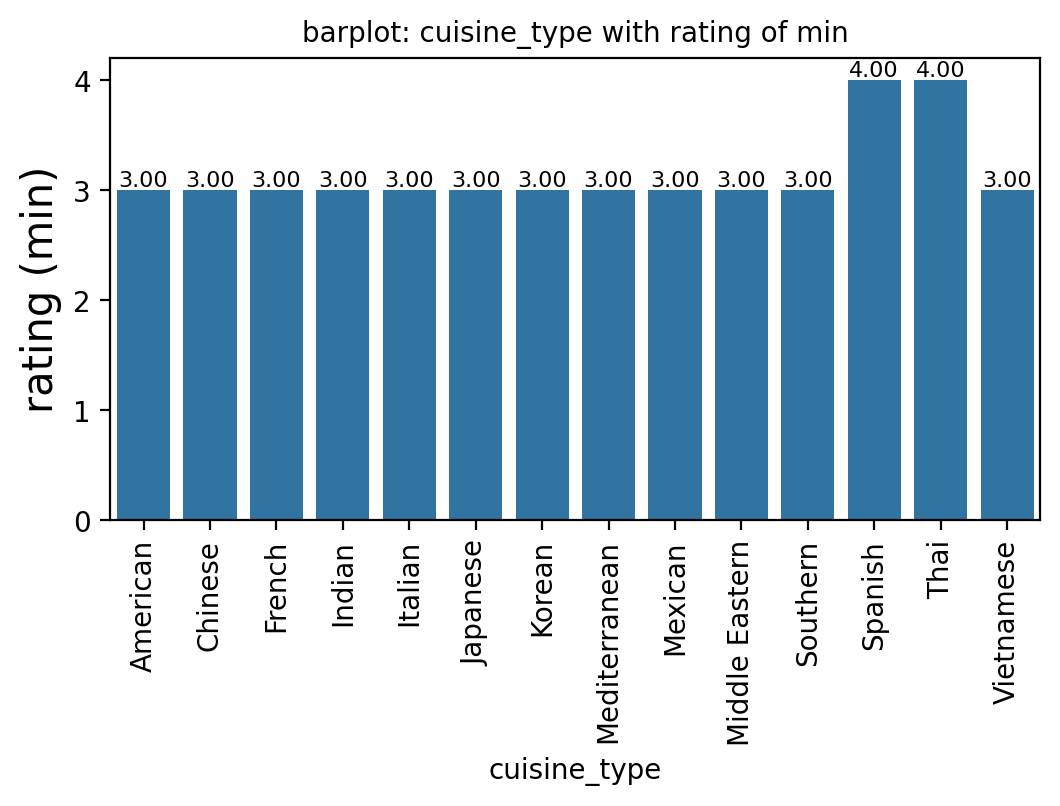

In [ ]:
# barplot between cusine type and ratings (min value of ratings)

cus_rat = dataWR.groupby('cuisine_type')['rating'].min().to_frame().reset_index()
#sns.barplot(x='cuisine_type', y='rating', data=cus_rat, ax=ax);



#dataWR[dataWR.groupby('cuisine_type')['rating'].transform(max) == dataWR['rating']

# Count plot for cuisine_type in order of highest to lowest
fig, ax = plt.subplots(figsize=(6, 3), dpi=200)
ax.set_title('barplot: cuisine_type with rating of min', fontsize=10)
ax.set_ylabel(f'rating (min)', fontsize = 15)
sns.barplot(x='cuisine_type', y='rating', data=cus_rat, ax=ax);


# Rotate x-axis labels properly
for label in ax.get_xticklabels():
    label.set_rotation(90)

# Calculate the total number of entries for percentage calculation
total = data['cuisine_type'].value_counts().sum()

# Annotate bars with percentage information
for p in ax.patches:
    #percentage = f'{100 * p.get_height() / total:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    #ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=8)
    ax.annotate(f'{p.get_height():.2f}', (x, y), ha='center', va='bottom', fontsize=8)



#### Observations:
**barplot cuisine_type/rating(median & min):**  

* Seems like Chinese, Indian, Italian, Japanese, Mexican, Spanish and Thai get better ratings (caculated with median of rating)
* on the other hand, the minimum rating given to Spanish and Thai are higher than the others

In [ ]:
cus_rat

,cuisine_type,rating
0,American,3
1,Chinese,3
2,French,3
3,Indian,3
4,Italian,3
5,Japanese,3
6,Korean,3
7,Mediterranean,3
8,Mexican,3
9,Middle Eastern,3


****Trying PointPlot**: Now doing categorical analysis on **original dataSet**
* rating / delivery_time
* rating / cost_of_the_order



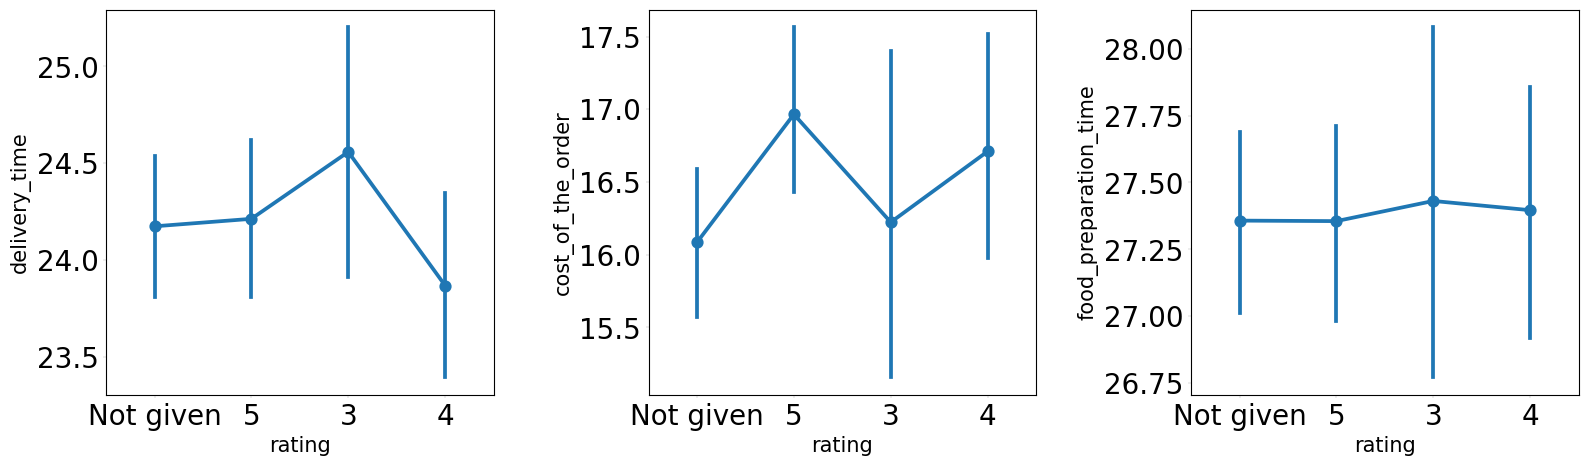

In [ ]:

cols = ['delivery_time', 'cost_of_the_order', 'food_preparation_time' ]

# Create a figure to host the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(19, 5))  # Adjusted for two plots side by side

# Loop through the columns and create a subplot for each one
for i, variable in enumerate(cols):
    ax = axes[i]
    sns.pointplot(data=data, x='rating', y=variable, ax=ax) # <------ Note: ax parameter is here
    # ax.set_title(f'{variable}' ,  fontsize=30)
    ax.set_xlabel(f'rating', fontsize = 15)
    ax.set_ylabel(f"{variable}", fontsize = 15)

    # Adjust space between the subplots
    plt.subplots_adjust(wspace=0.4)  # Adjust space betwen plots



    # Customize x-axis ticks
    ax.xaxis.set_tick_params(width=0.2, length=2, color='gray', labelsize=20, labelcolor='black')
    # Customize y-axis ticks (for example, showing their use)
    ax.yaxis.set_tick_params(width=0.2, length=2, color='gray', labelsize=20, labelcolor='black')

#### Observations:
**Point Plot shows some trends though not too significant:**  
* higher delivery time decreases rating
* higher cost seems to have better rating

**Multivariate: cuisine_type & cost_of_the_order**

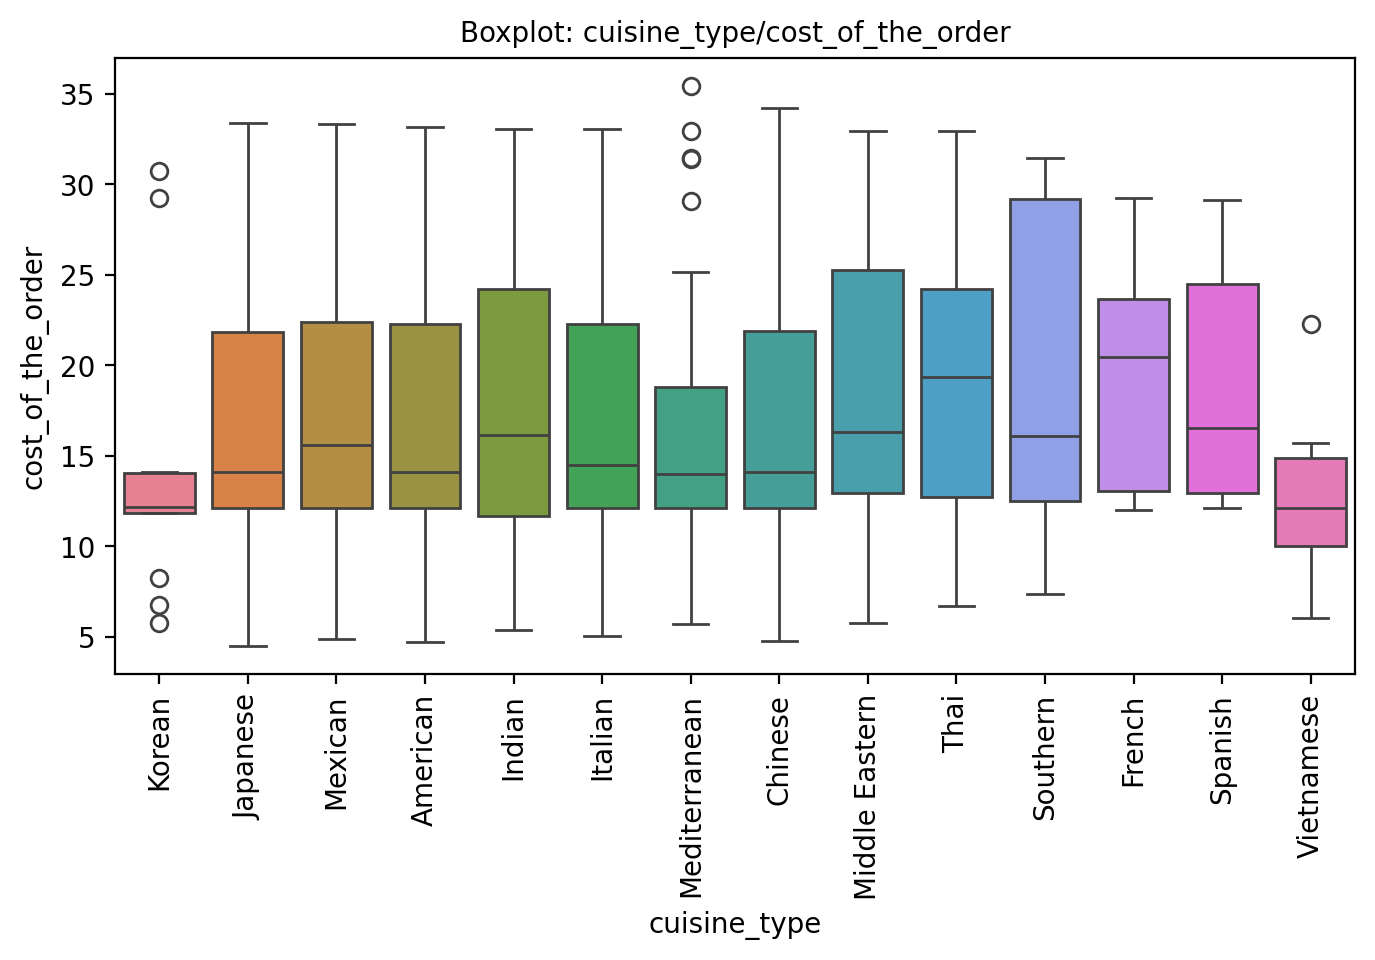

In [ ]:
# cuisine_type & cost_of_the_order
plt.figure(figsize=(8, 4), dpi=200)
plt.title('Boxplot: cuisine_type/cost_of_the_order', fontsize=10)
plt.xticks(rotation=90)
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=data);

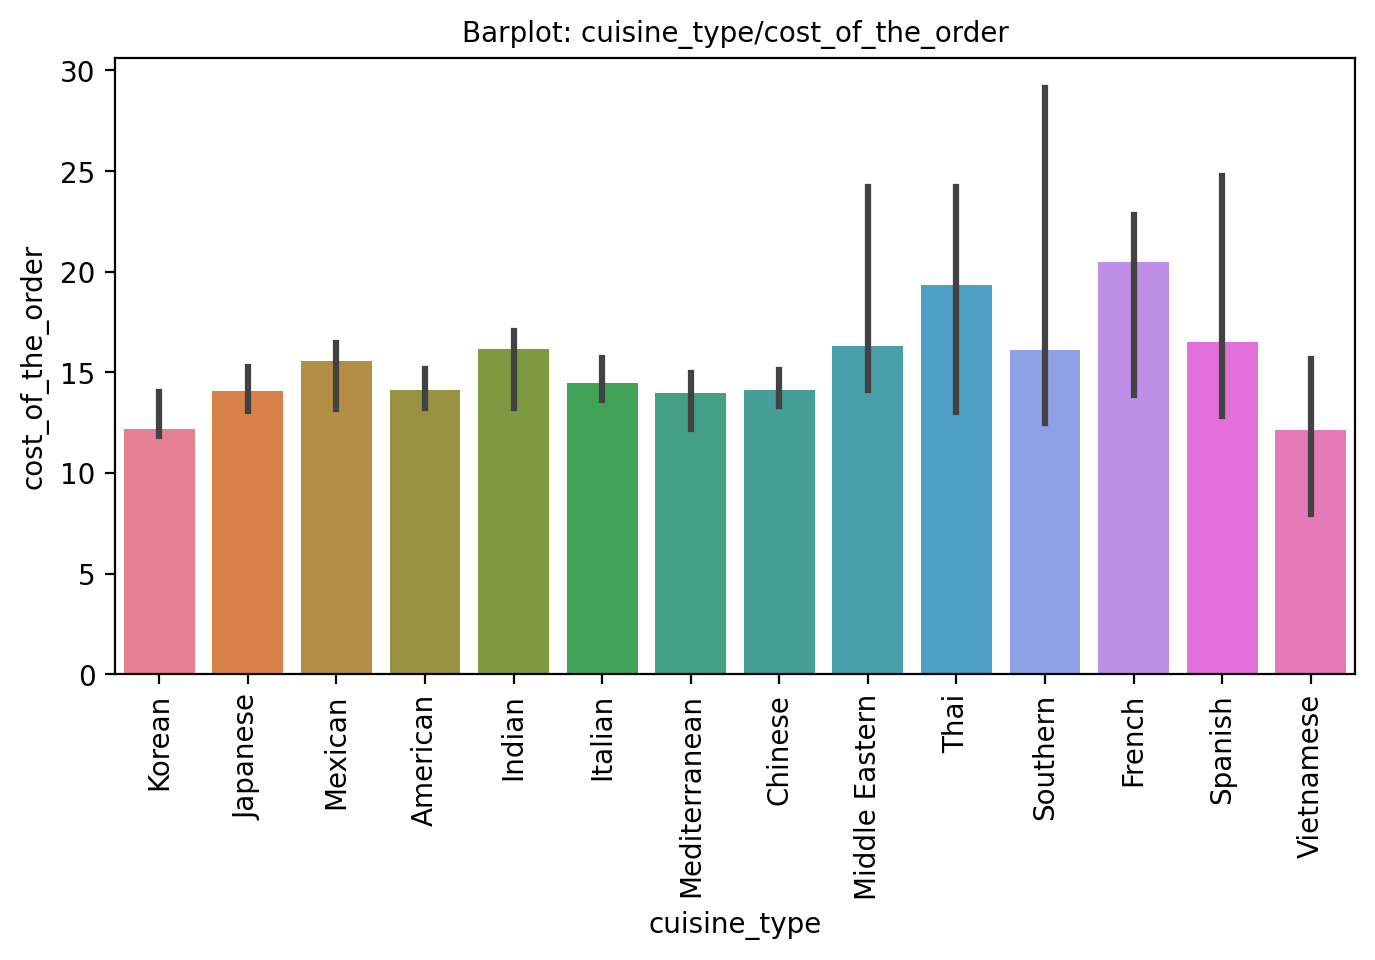

In [ ]:
# cuisine_type & cost_of_the_order
plt.figure(figsize=(8, 4), dpi=200)
plt.title('Barplot: cuisine_type/cost_of_the_order', fontsize=10)
plt.xticks(rotation=90)
sns.barplot(x='cuisine_type', y='cost_of_the_order', hue='cuisine_type', data=data, estimator=np.median);

#### Observations:
**Boxplot and Barplot cuisine_type & cost_of_the_order:**  
* Thai, French and Spanish are more costly
* Vietnamase and Korean on on the cheaper side
* Korean and Mediterranean have quite a few outliers

**Multivariate: Weekday/Weekend & Deliry Time**

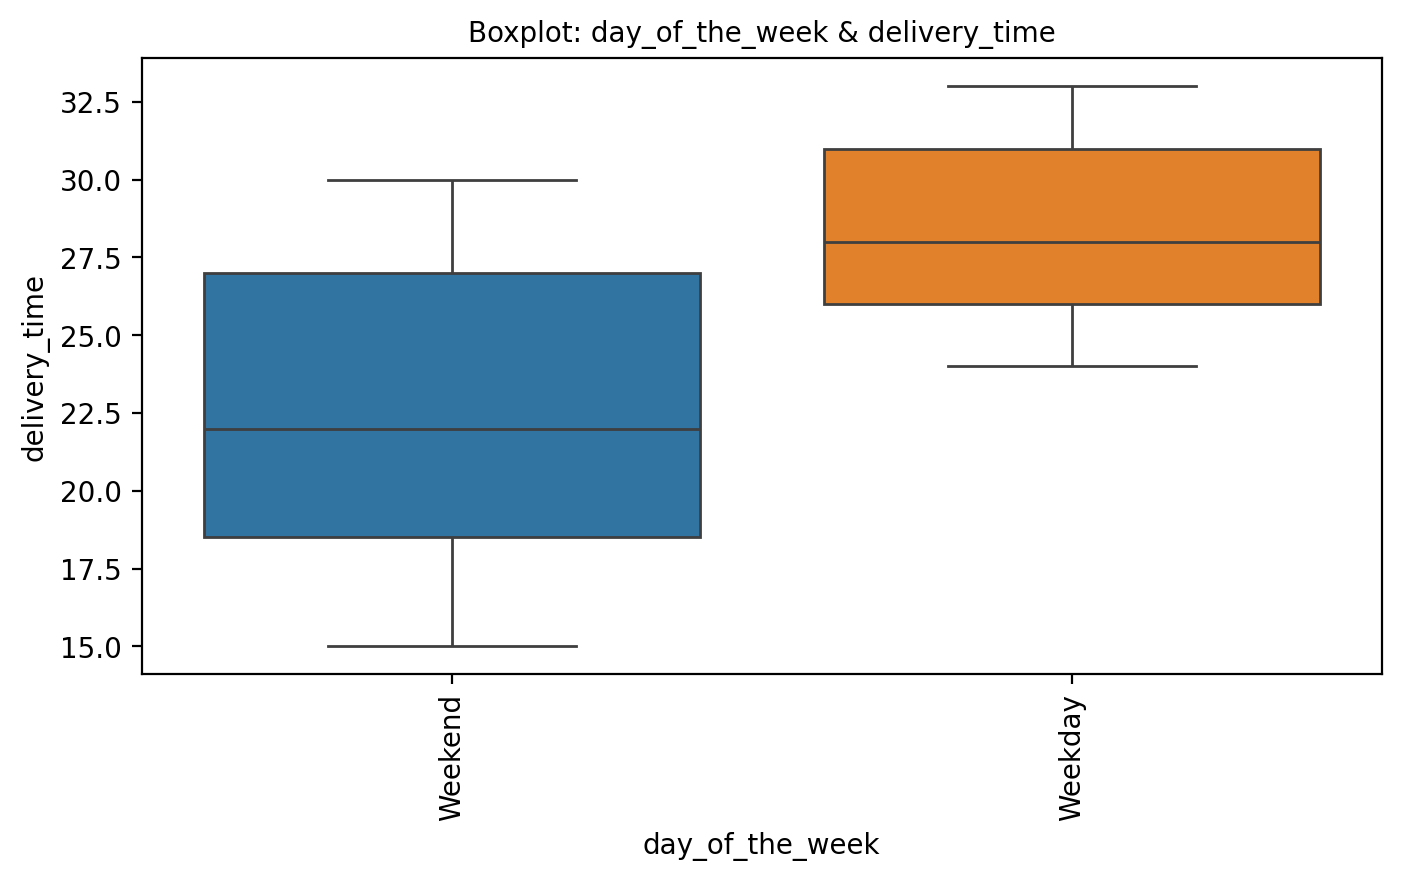

In [ ]:
# Multivariate: Weekday/Weekend & Delivery Time

plt.figure(figsize=(8, 4), dpi=200)
plt.title('Boxplot: day_of_the_week & delivery_time', fontsize=10);
plt.xticks(rotation=90)
sns.boxplot(x='day_of_the_week', y='delivery_time', hue='day_of_the_week', data=data);


#### Observations:
**Boxplot: day_of_the_week & delivery_time:**  
* Weekend Deliveries are generally faster.  Possibly due to more delivery drivers and/or less traffic

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# first lets eliminate the `Not given` ratings and convert the others to Integers

# dataWR is data with Ratings only
dataWR = data[data['rating']!='Not given'].copy()
dataWR['rating'] = dataWR['rating'].astype('int64')

# Let's group them by restuarant_name and rating and use .agg() to aggregate count and mean
grouped = dataWR.groupby('restaurant_name')['rating'].agg(['count', 'mean']) # created DF with index of restaurant_name and columns of count and mean
filtered_restaurants = grouped[(grouped['count'] > 50) & (grouped['mean'] > 4)]
filtered_restaurants.reset_index(inplace=True)
filtered_restaurants


,restaurant_name,count,mean
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations:

**Restaurants with ratings mean higher than 4 and more than 50 ratings**
```csv

     restaurant_name	           count	      mean
0	   Blue Ribbon Fried Chicken	 64	          4.328125
1	   Blue Ribbon Sushi	         73	          4.219178
2	   Shake Shack	              133	          4.278195
3	   The Meatball Shop	         84	          4.511905
```


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# 15% charges for  5 < cost_of_the_order < 20
fifteen_percent_revenue = (data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum())*0.15

# 25% charges for cost_of_the_order > 20
twenty5_percent_revenue = (data[data['cost_of_the_order'] > 20]['cost_of_the_order'].sum())*0.25

# Net revenue
net_revenue = (fifteen_precent_revenue + twenty5_precent_revenue).round(2)
print(f"{net_revenue} dollars")

6166.3 dollars


#### Observations:
**Net Revenue from 15% and 25% overages:** 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# First get the deliveries that take more than 60 minutes, insert new column
data_TD_time = data.copy()
data_TD_time['Time_to_Delivery'] = data_TD_time['food_preparation_time'] + data_TD_time['delivery_time']
t60plus = data_TD_time[data_TD_time['Time_to_Delivery'] > 60]

# Now calulate the total number of deliveries
t60plus_counts = t60plus['Time_to_Delivery'].count()

# what's the total number of deliveries (from original data)
total_delivery_counts = data['delivery_time'].count()

# Percentage of deliveries that take more than 60 minutes
percentage = (t60plus_counts/total_delivery_counts)*100
print(f"Total Delivery Time > 60 minutes: {percentage:.2f}%")



Total Delivery Time > 60 minutes: 10.54%


#### Observations:
**Total Delivery Time > 60 minutes:** 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
data.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Below is a histogram with mean value line to show the same thing**

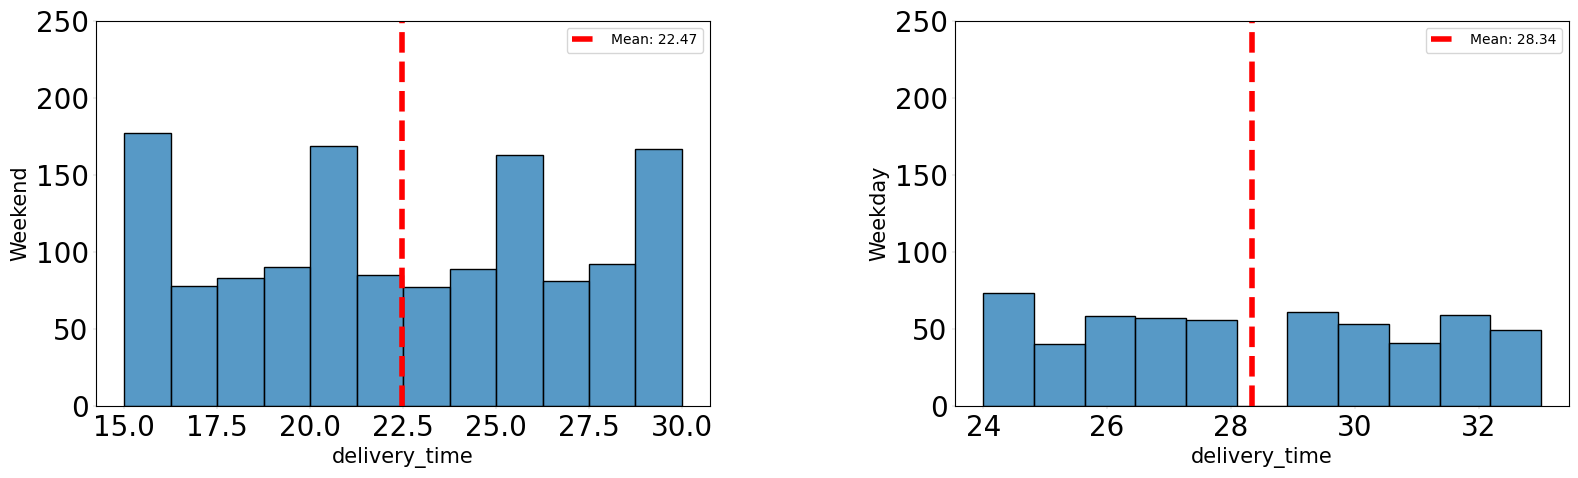

In [ ]:
weekend = data[data['day_of_the_week'] =='Weekend']
weekday = data[data['day_of_the_week'] !='Weekend']

cols = [weekend, weekday]



# # Create a figure to host the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(19, 5))  # Adjusted for two plots side by side


# Loop through the columns and create a subplot for each one
for i, variable in enumerate(cols):
     ax = axes[i]
     sns.histplot(data=variable,  x='delivery_time', ax=ax) # <------ Note: ax parameter is here
     # ax.set_title(f'{variable}' ,  fontsize=30)
     ax.set_xlabel(f'delivery_time', fontsize = 15)

     # Setting the y label
     if i == 0:
        ax.set_ylabel(f"Weekend", fontsize = 15)
     else:
        ax.set_ylabel(f"Weekday", fontsize = 15)

     ax.set_ylim(0, 250)  # Make y axis same for both plots, so it's easy to comapre visually

     # Draw a vertical line at the mean value
     mean_value = variable['delivery_time'].mean()
     ax.axvline(mean_value, color='red', linestyle='--', linewidth=4, label=f'Mean: {mean_value:.2f}');
     ax.legend()

     # Adjust space between the subplots
     plt.subplots_adjust(wspace=0.4)  # Adjust space betwen plots



     # Customize x-axis ticks
     ax.xaxis.set_tick_params(width=0.2, length=2, color='gray', labelsize=20, labelcolor='black')
     # Customize y-axis ticks (for example, showing their use)
     ax.yaxis.set_tick_params(width=0.2, length=2, color='gray', labelsize=20, labelcolor='black')

#### Observations:
**mean delivery times on weekends is a bit faster**
```csv
day_of_the_week    mean
Weekday           28.340037
Weekend           22.470022
```


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Data Composition and Integrity**
*  The dataset comprises 1,898 orders across nine columns with a mix of data types, including integers, floating-point numbers, and strings.
* There is no missing data, which simplifies the analysis process and reduces the need for data imputation.

**Delivery and Preparation Times**
* Food preparation times are consistent, with a mean close to the median, indicating a symmetrical distribution.
* Delivery times show a slight left skew but are generally consistent, with most deliveries around 28 minutes, suggesting efficient operations.

**Customer Behavior**
* Weekends are significantly busier, capturing 71% of orders, which aligns with typical dining patterns.
* The mean delivery time is quicker on weekends, possibly due to increased staffing or lower traffic levels.

**Cost and Cuisine Type**
* The cost of orders is right-skewed, with most orders clustering around $12.
* American food is the most popular cuisine, followed by Japanese and Italian, suggesting varied customer preferences but a dominance of American cuisine.
* More expensive cuisines like Thai, French, and Spanish show higher variability in order costs, with several outliers indicating occasional high-priced orders.

**Ratings Analysis**
* No strong correlation is evident between ratings and other parameters such as delivery time or cost, even after excluding unrated orders.
* Restaurants with more than 50 ratings and a mean rating above 4 show strong customer satisfaction, particularly notable in establishments like The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Shake Shack.

**Revenue Insights**
* The net revenue (for foodhub)  from surcharges on orders above \$5 and above \$20 is \$6,166.30, highlighting the financial benefit of targeting higher-value orders.
* Orders over 60 minutes constitute only 10.54% of total deliveries, indicating effective delivery time management overall.

### Recommendations:

**Operational Focus**
* Increase staffing or optimize delivery routes on weekends to leverage the higher traffic and maintain or improve quick delivery times.
* Consider incentives for customers to order on weekdays to balance the order load throughout the week.

**Cuisine and Pricing Strategy**
* Given the popularity of American, Japanese, and Italian cuisines, consider promotional campaigns or special deals to drive higher sales in these categories.
* Analyze the pricing strategy for cuisines with higher cost variability to ensure pricing aligns with customer expectations and market standards.

**Customer Engagement and Retention**
* Develop loyalty programs or special offers for frequent customers, particularly those who contribute significantly to revenue like the top 3 most frequent customers identified.
* Use targeted marketing strategies to improve ratings and encourage more reviews, particularly focusing on customers who have not given ratings.

**Expansion of Data Analysis**
* Consider integrating more granular data, such as specific times of day or detailed geographic information, to further refine delivery logistics and marketing strategies.
* Explore the potential for segmenting customers based on order patterns and preferences to tailor marketing and service more effectively.

These conclusions and recommendations are designed to optimize operational efficiency, enhance customer satisfaction, and ultimately drive revenue growth based on the insights derived from your data analysis.

# Converting to html format for submission

---

In [ ]:
%%shell
#convert to html
jupyter nbconvert --to html
jupyter nbconvert sm-PYF_Project_LearnerNotebook_FullCode.ipynb --to html

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr